# Loan Prediction Based On Customer Behaviour

by: Alief Devara Nabil Batch 5

## Data Preparation

In [160]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [161]:
%cd /content/gdrive/MyDrive/Dibimbing/Long Term Assign

/content/gdrive/MyDrive/Dibimbing/Long Term Assign


In [217]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score # AUC ROC
from sklearn.metrics import average_precision_score # AUC PRC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [163]:
#Loading Data
df_train = pd.read_csv('Training Data.csv')
df_test = pd.read_csv('Test Data.csv')

#Data Wrangling
df_train_eda = df_train.copy()

## Quick Exploration

In [164]:
df_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [165]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [166]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


Train dataset memiliki jumlah data lebih banyak dibandingkan Test Dataset

In [167]:
#Check the difference between 2 dataset
cols_diff = df_train.columns.difference(df_test.columns)

df_train[cols_diff]

,Id,Risk_Flag
0,1,0
1,2,0
2,3,0
3,4,1
4,5,1
...,...,...
251995,251996,0
251996,251997,0
251997,251998,0
251998,251999,0


Train Dataset memiliki kolom Id dan Risk_Flag yang tidak dimiliki Test Dataset. Perlu diperhatikan bahwa Id dan ID walaupun serupa, namun bernama beda. Selain 2 kolom tersebut seluruh fitur antar kedua dataset serupa.

In [168]:
#Check Missing Value
df_train.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Dataset tidak memiliki value NA atau Null, bisa dikatakan data telah bersih

## Feature Engineering

In [169]:
#Label Encode the Married/Single and Car_Ownership columns
single_transformer = preprocessing.LabelEncoder()
car_owner_transformer = preprocessing.LabelEncoder()

single_transformer.fit(df_train['Married/Single'])
car_owner_transformer.fit(df_train['Car_Ownership'])
    
df_train['Is_Single'] = single_transformer.transform(df_train['Married/Single'])
df_train['Has_Car'] = car_owner_transformer.transform(df_train['Car_Ownership'])
    
cols_to_drop = ['Married/Single', 'Car_Ownership', 'Id']
df_train = df_train.drop(columns=cols_to_drop)

In [170]:
df_train.head()

,Income,Age,Experience,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Is_Single,Has_Car
0,1303834,23,3,rented,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0
1,7574516,40,10,rented,Software_Developer,Parbhani,Maharashtra,9,13,0,1,0
2,3991815,66,4,rented,Technical_writer,Alappuzha,Kerala,4,10,0,0,0
3,6256451,41,2,rented,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,1
4,5768871,47,11,rented,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0


In [171]:
#Categorize Encode House_Ownership, Profession, CITY, and STATE columns
cols_to_categorize = ['House_Ownership', 'Profession', 'CITY', 'STATE']

for colname in cols_to_categorize:  
    one_hot = preprocessing.LabelEncoder()
    one_hot.fit(df_train[colname])
    df_train.loc[:, colname] = one_hot.transform(df_train[colname].copy())

In [172]:
df_train.head()

,Income,Age,Experience,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Is_Single,Has_Car
0,1303834,23,3,2,33,251,13,3,13,0,1,0
1,7574516,40,10,2,43,227,14,9,13,0,1,0
2,3991815,66,4,2,47,8,12,4,10,0,0,0
3,6256451,41,2,2,43,54,17,2,12,1,1,1
4,5768871,47,11,2,11,296,22,3,14,1,1,0


## Data EDA

In [173]:
df_train_eda[['Married/Single', 'House_Ownership', 'Car_Ownership']].value_counts(normalize=True)

Married/Single  House_Ownership  Car_Ownership
single          rented           no               0.575524
                                 yes              0.248635
married         rented           no               0.067405
single          owned            no               0.033155
married         rented           yes              0.028667
single          norent_noown     no               0.018262
                owned            yes              0.014444
                norent_noown     yes              0.007885
married         owned            no               0.002413
                norent_noown     no               0.001655
                owned            yes              0.001250
                norent_noown     yes              0.000706
dtype: float64

Dapat terlihat dari data diatas bahwa dataset didominasi oleh **Single Person with Rented House and No Car**, sedangkan **Married Person with No Rent/Owned House and Having Car** menjadi kategori paling sedikit. Dari ini dapat dilihat behaviour dan kategori orang sebagai calon peminjam uang.

In [174]:
df_train_eda.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Disini saya melihat Avg atau Mean dari data dimana calon peminjam memiliki rata-rata A**ge 49.5 tahun, Experience 10 tahun, CURRENT_JOB_YRS 3.6 tahun, dan CURRENT_HOUSE_YRS 6 tahun**

In [219]:
def plot_corr_mtx_pandas(df, method='spearman'):
    corr_mtx = df.corr(method=method)
    return corr_mtx.style.background_gradient(cmap='coolwarm')

In [220]:
corr_mtx = plot_corr_mtx_pandas(df_train)

corr_mtx

,Income,Age,Experience,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Is_Single,Has_Car
Income,1.000000,-0.000769,0.006387,0.012240,0.000843,-0.001883,-0.004041,0.004253,-0.002450,-0.003082,0.002782,0.004012
Age,-0.000769,1.000000,-0.001063,-0.014262,-0.008637,0.002323,-0.004684,-0.001889,-0.020129,-0.021852,-0.005342,0.009382
Experience,0.006387,-0.001063,1.000000,-0.011094,0.001003,-0.025966,-0.001225,0.643308,0.019240,-0.034443,-0.001748,0.007582
House_Ownership,0.012240,-0.014262,-0.011094,1.000000,0.004434,-0.015640,-0.013319,-0.005583,-0.010074,0.026466,-0.025624,-0.001777
Profession,0.000843,-0.008637,0.001003,0.004434,1.000000,0.018591,0.002232,-0.002883,0.001788,-0.004772,-0.007581,0.011760
CITY,-0.001883,0.002323,-0.025966,-0.015640,0.018591,1.000000,-0.044181,-0.025774,-0.010530,0.004569,0.012351,0.001665
STATE,-0.004041,-0.004684,-0.001225,-0.013319,0.002232,-0.044181,1.000000,0.008564,0.006885,-0.002942,-0.009388,0.025483
CURRENT_JOB_YRS,0.004253,-0.001889,0.643308,-0.005583,-0.002883,-0.025774,0.008564,1.000000,0.004999,-0.018459,0.003987,0.009160
CURRENT_HOUSE_YRS,-0.002450,-0.020129,0.019240,-0.010074,0.001788,-0.010530,0.006885,0.004999,1.000000,-0.004385,-0.007524,0.000315
Risk_Flag,-0.003082,-0.021852,-0.034443,0.026466,-0.004772,0.004569,-0.002942,-0.018459,-0.004385,1.000000,0.021092,-0.024036


Terdapat korelasi yang tinggi antara Experience dan CURRENT_JOB_YRS	dimana hal ini masuk akal jika seseorang memiliki Job Years yang tinggi maka ia memiliki pengalaman yang tinggi. Selain itu, tidak ada korelasi yang tinggi antara fitur lain.

In [175]:
agg_demography_col = ['Age', 'Income']

agg_df_demography = df_train_eda[['Age', 'Income', 'Risk_Flag']] \
                            .groupby(['Age', 'Risk_Flag']) \
                            .mean() \
                            .sort_values(by='Age') \
                            .reset_index()

agg_df_demography['Risk_Flag'].replace({0: "No Risk",
                                        1: "Risk"
                                       }, inplace=True)

In [176]:
mean_general = df_train_eda[df_train_eda['Risk_Flag'] == 1]

mean_general = mean_general['Income'].mean()

mean_array = mean_general * np.ones(agg_df_demography['Age'].nunique())

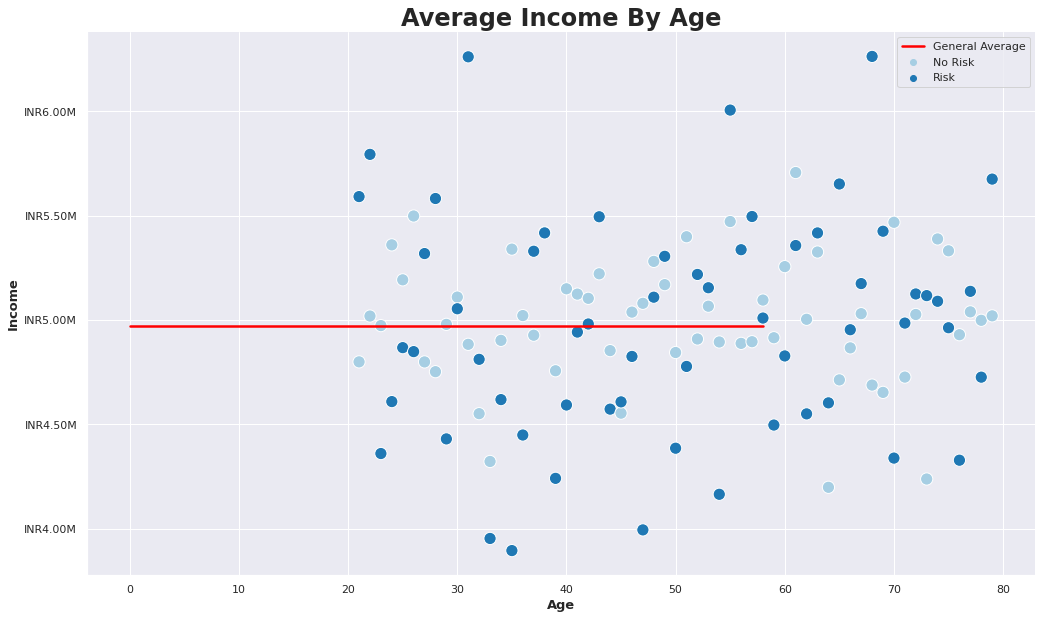

In [177]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize = (17,10))

g = sns.scatterplot(x="Age",
                    y="Income",
                    data=agg_df_demography,
                    hue='Risk_Flag',
                    legend=True,
                    s=150,
                    palette='Paired')

plt.plot(mean_array, label='General Average', color='red')

ax.legend(loc='best')

ylabels = ['INR' + '{:,.2f}'.format(x) + 'M' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)

ax.set_title('Average Income By Age',
             fontdict={'fontsize':24,
                       'fontweight':'bold'})
ax.set_xlabel('Age',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})
ax.set_ylabel('Income',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})

sns.despine()

plt.show()

Pada Scatterplot ini ada beberapa analisis yang bisa saya dapatkan:
1. Bahwa seseorang memiliki umur yang semakin tua, tidak menjamin ia memiliki Income yang tinggi. Mungkin hal ini ditentukan oleh Profesinya serta Kota/Prov yang ia tempati.
2. Parameter umur tidak bisa menjamin seseorang menjadi peminjam **Risk**. Tidak selamanya yang berumur muda masuk kedalam kategori riskan, bahkan saya melihat kategoti umur diatas 30 tahun lebih banyak masuk dalam kategori peminjam riskan



In [178]:
#Count Each City in their respective STATE
cols_geography = ['CITY', 'STATE', 'Risk_Flag']
agg_by_state = df_train_eda[cols_geography].groupby(['STATE', 'Risk_Flag']) \
                                            .count() \
                                            .reset_index() \
                                            .rename(columns={
                                                        'CITY': '#People'
                                                            })
#By The Percentage
agg_by_state['Percentage_Total'] = (agg_by_state['#People'] \
                                / agg_by_state['#People'].sum())*100
#Rename Risk Flag for Legend Purpose
agg_by_state['Risk_Flag'] = agg_by_state['Risk_Flag'].replace({0:'No Risk',
                                                               1:'Risk'})

In [179]:
#Average Income in Every State
cols_geography = ['STATE', 'Risk_Flag', 'Income']

agg_by_state_income = df_train_eda[cols_geography].groupby(['STATE', 'Risk_Flag']) \
                                            .mean() \
                                            .reset_index() \
                                            .rename(columns={
                                                        'Income': 'Avg Income'
                                                            })

agg_by_state['Avg Income'] = agg_by_state_income['Avg Income']

In [180]:
agg_by_state.head()

,STATE,Risk_Flag,#People,Percentage_Total,Avg Income
0,Andhra_Pradesh,No Risk,22362,8.873810,5.111795e+06
1,Andhra_Pradesh,Risk,2935,1.164683,4.928169e+06
2,Assam,No Risk,6132,2.433333,4.822776e+06
3,Assam,Risk,930,0.369048,4.965814e+06
4,Bihar,No Risk,17197,6.824206,5.039566e+06


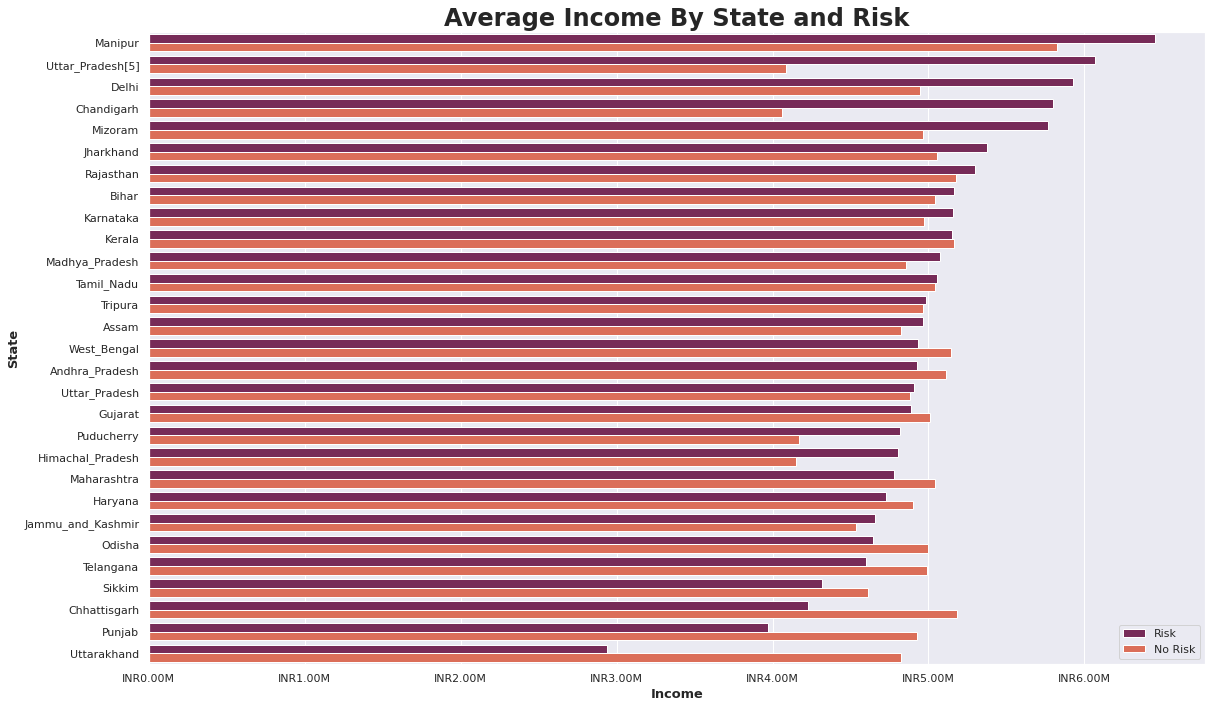

In [181]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize = (17,10))

agg_by_state = agg_by_state.sort_values(by=['Risk_Flag', 'Avg Income'], ascending=False)

g = sns.barplot(data=agg_by_state, y='STATE',
            x='Avg Income', hue='Risk_Flag', palette = 'rocket')

ax.set_title('Average Income By State and Risk',
             fontdict={'fontsize':24,
                       'fontweight':'bold'})
ax.set_xlabel('Income',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})
ax.set_ylabel('State',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})

xlabels = ['INR' + '{:,.2f}'.format(x) + 'M' for x in g.get_xticks()/1000000]
g.set_xticklabels(xlabels)

plt.legend(loc='best')
plt.tight_layout()

plt.show()

In [182]:
# Count number of clients in each state
state_count = df_demography['STATE'].value_counts().sort_index()

# Aggregate data to get proportion of risk operations in each state
agg_by_state_only_risk = agg_by_state[agg_by_state['Risk_Flag'] == 'Risk'].copy()
agg_by_state_only_risk = agg_by_state_only_risk.sort_values(by=['STATE'])

agg_by_state_only_risk['#People_State'] = state_count.values

agg_by_state_only_risk['Percentage_Risk'] = (agg_by_state_only_risk['#People'].values \
                                            / state_count.values) * 100
                
agg_by_state_only_risk = agg_by_state_only_risk.sort_values(
                                                by=['Percentage_Risk'],
                                                ascending=False)

In [183]:
agg_by_state_only_risk.head()

,STATE,Risk_Flag,#People,Percentage_Total,Avg Income,#People_State,Percentage_Risk
31,Manipur,Risk,183,0.072619,6.452880e+06,849,21.554770
49,Tripura,Risk,136,0.053968,4.984898e+06,809,16.810878
25,Kerala,Risk,970,0.384921,5.148648e+06,5805,16.709733
19,Jammu_and_Kashmir,Risk,283,0.112302,4.656932e+06,1780,15.898876
27,Madhya_Pradesh,Risk,2180,0.865079,5.075821e+06,14122,15.436907


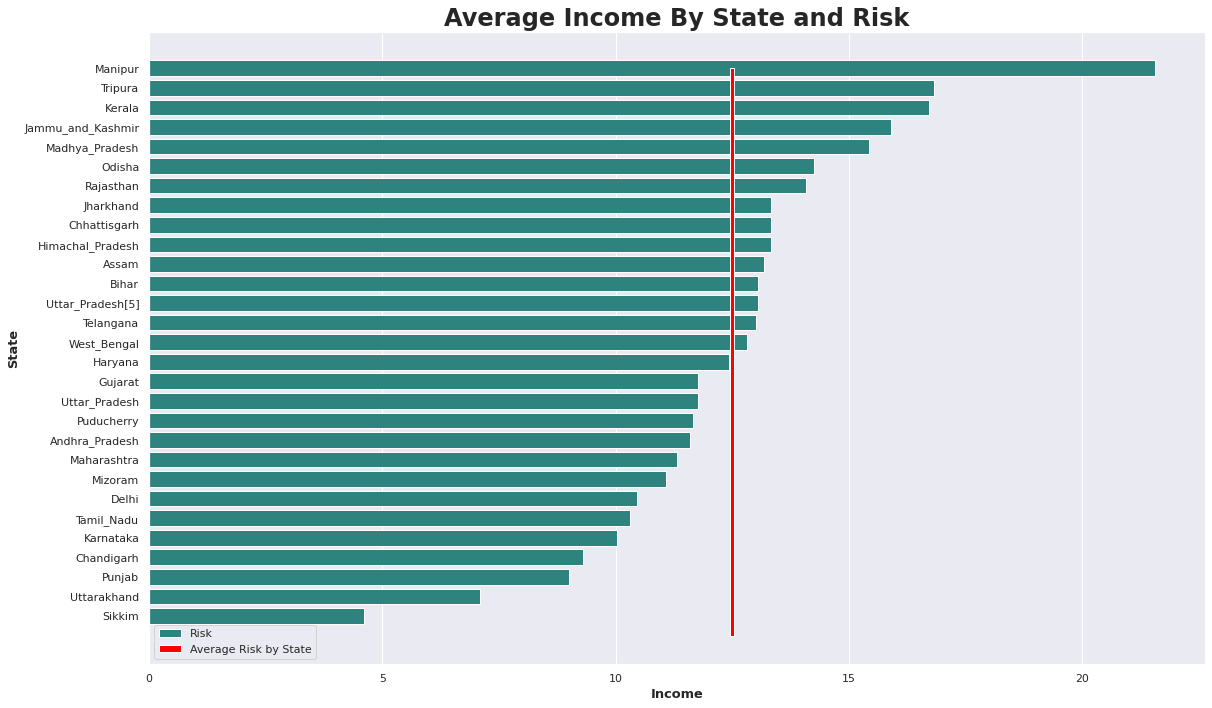

In [222]:
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

fig, ax = plt.subplots(figsize = (17,10))

g = sns.barplot(data=agg_by_state_only_risk, y='STATE',
            x='Percentage_Risk', hue='Risk_Flag',palette='viridis')

risk_mean = agg_by_state_only_risk['Percentage_Risk'].mean()

plt.bar(x=risk_mean, height = len(agg_by_state_only_risk), width=0.1,
        label='Average Risk by State', color='red')


ax.set_title('Average Income By State and Risk',
             fontdict={'fontsize':24,
                       'fontweight':'bold'})
ax.set_xlabel('Income',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})
ax.set_ylabel('State',
              fontdict={'fontsize':13,
                       'fontweight':'bold'})
plt.legend(loc='best')

plt.tight_layout()

plt.show()

Manipur sebagai kota dengan persentase jumlah peminjam kategori riskan terbanyak pada data. Faktanya, mayoritas dari State yang ada memiliki banyak peminjam riskan, melewati rata rata peminjam riskan seluruh State.

## Machine Learning (Base Model)

**Evaluation Metric**

For this problem:

**True Positive (TP)**: our model predicted a high probability of loan default, and it would be a default.

**True Negative (TN)**: our model predicted that the operation has a low risk and it had a low risk;

**False Positive (FP)**: our model predicted RISK, and it hasn't happened a loan default;

**False Negative (FN)**: our model predicted NO RISK, and the operation was RISK <--- Worst case scenario.

Disini kita ingin memaksimalkan True Positive dan True Negative maka digunakan Metric untuk menilai model menggunkan:


*   AUC ROC: Area dibawah kurva ROC
*   AUC PRC: Area dibawah precision-recall kurva


In [185]:
risk_pct = df_train['Risk_Flag'].value_counts(normalize=True)

risk_pct

0    0.877
1    0.123
Name: Risk_Flag, dtype: float64

### Split the Data

10% validation: with 12.4% risk (seed=42)

20% test: with 12.3% risk (seed=42)

70% training: with 12.2% risk (seed=42)

Sebelumnya kita meilhat bahwa kategori No Risk jumlahnya sangatlah besar dibanding Risk maka dalam split ini kategori Risk haruslah displit secara merata sebesar 12%.

In [196]:
def split_val_train_test(df, col_target, divison_pct=[0.1,0.2], rdn_seed=42):
    """
    Split Dataframe into X and Y and 
    then Split into Validation, Train and Test
    """
    from sklearn.model_selection import train_test_split
    
    X = df.drop(columns=col_target).copy()
    Y = df[col_target].copy().values.ravel()
    
    # Validation dataset
    if(divison_pct[0] > 0):
        X_not_val, X_val, Y_not_val, Y_val = train_test_split(X,
                                                              Y,
                                                              test_size=divison_pct[0],
                                                              random_state=rdn_seed)
    else:
        X_not_val = X
        Y_not_val = Y
        X_val = []
        y_val = []
        
    # Train and test dataset
    X_train, X_test, Y_train, Y_test = train_test_split(X_not_val,
                                                        Y_not_val,
                                                        test_size=divison_pct[1],
                                                        random_state=rdn_seed)
    
    # Return splitted data as dictionary 
    splitted_data = [X_train, X_test, X_val, Y_train, Y_test, Y_val]
    key_names = ['X_train', 'X_test', 'X_val', 'Y_train', 'Y_test', 'Y_val']
    splitted_data_dict = dict(zip(key_names, splitted_data))

    return splitted_data_dict

In [198]:
X_train, X_test, Y_train, Y_test = [],[],[],[]
col_target = ['Risk_Flag']

splitted_data_dict = split_val_train_test(df_train, col_target)

# Assigning values
X_train, Y_train = splitted_data_dict['X_train'], splitted_data_dict['Y_train']
X_test, Y_test = splitted_data_dict['X_test'], splitted_data_dict['Y_test']
X_val, Y_val = splitted_data_dict['X_val'], splitted_data_dict['Y_val']

In [199]:
X_train.head()

,Income,Age,Experience,House_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Is_Single,Has_Car
72450,7268991,35,7,2,48,12,0,7,10,1,1
195782,5288986,47,3,2,12,191,23,3,12,1,0
250365,3954174,33,16,2,22,278,28,3,14,1,0
200930,808476,36,1,2,6,81,10,1,13,1,0
185020,8845611,37,14,2,37,26,22,10,13,1,0


Funtion for Every Metric Plot (ROC, PRC, Confusion)

In [211]:
def plot_clf_metrics(clf, model_name, X_test, Y_true, class_pred=1):
    Y_pred = clf.predict_proba(X_test)[:, class_pred]

    roc_auc = round(roc_auc_score(Y_true, Y_pred), 2)
    prc_auc = round(average_precision_score(Y_true, Y_pred), 2)

    print('AUC ROC = {}\nAUC PRC = {}'.format(roc_auc, prc_auc))

    # ROC plot
    metrics.plot_roc_curve(clf, X_test, Y_true)
    plt.title('ROC Curve - ' + model_name)
    plt.tight_layout()
    #plt.savefig(img_out_path+'roc_auc_+'+model_name)
    plt.show()           


    # PRC plot
    disp = metrics.plot_precision_recall_curve(clf, X_test, Y_true)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                       'AP={0:0.2f}'.format(prc_auc))
    plt.tight_layout()
    #plt.savefig(img_out_path+'prc_auc_+'+model_name)
    plt.show()


    # Confusion Matrix plot
    plot_confusion_matrix(clf, X_test, Y_true) 
    plt.tight_layout()

    plt.show()

### Logistic Regression

In [209]:
clf_logst_base= LogisticRegression(random_state=0,
                                   class_weight='balanced',
                                   max_iter=500)

clf_logst_base.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=500, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

AUC ROC = 0.5
AUC PRC = 0.13


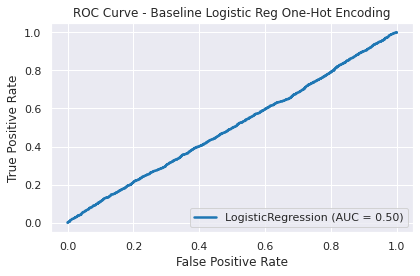

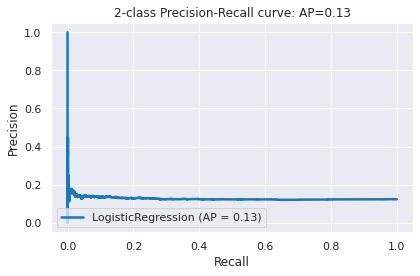

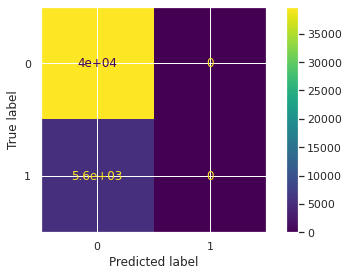

In [214]:
plot_clf_metrics(clf_logst_base, 'Baseline Logistic Reg One-Hot Encoding', X_test, Y_test)

AUC ROC -- 0.5

AUC PRC -- 0.13

Confusion matrix: Model tidak menemukan loan default

### Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier

clf_tree_base_2 = DecisionTreeClassifier(random_state=0,
                               class_weight='balanced')

clf_tree_base_2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

AUC ROC = 0.84
AUC PRC = 0.4


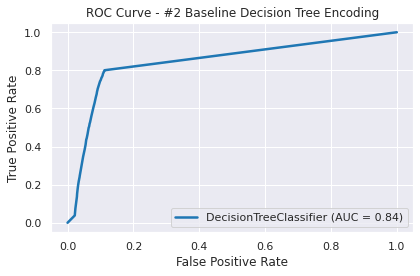

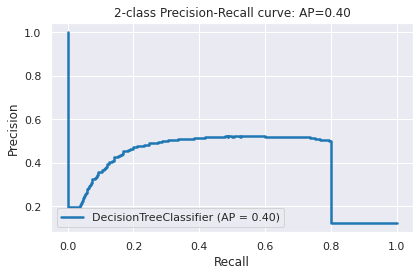

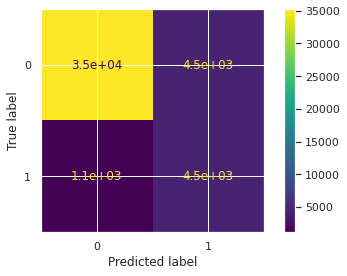

In [215]:
plot_clf_metrics(clf_tree_base_2, '#2 Baseline Decision Tree Encoding',
                 X_test, Y_test)

AUC ROC -- 0.84

AUC PRC -- 0.4

Sejauh ini merupakan model terbaik. Untuk saat ini belum saya lanjutkan karena saya sendiri baru mengenal dua model dalam implementasi Supervised Machine Learning.

Mohon bantuannya, bagaimana jika saya ingin memaksimalkan kembali model dan terakhir membandingkan dengan Dataset Test jika di Python